In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import pylab as p

%matplotlib inline

train = pd.read_csv("../input/train.csv")
# train['loss'] = np.log(train['loss']+200)
#plt.rcParams['figure.figsize'] = 8, 6 #[6.0, 4.0]

In [2]:
train['cat109'].head()

0    BU
1    BI
2    AB
3    BI
4     H
Name: cat109, dtype: object

In [3]:
def LetterRep(x,LevelList):
    if x in LevelList:
        x = '0'+x
    return x

LevelList = {'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'}
train_2 = train.applymap(lambda x: LetterRep(x,LevelList))

In [4]:
train_2['cat109'].head()

0    BU
1    BI
2    AB
3    BI
4    0H
Name: cat109, dtype: object

In [5]:
features = train.columns
cats = [feature for feature in features if feature.startswith('cat')]
for feat in cats:
    train[feat] = pd.factorize(train[feat], sort=True)[0]

In [6]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [7]:
features = train_2.columns
cats = [feature for feature in features if feature.startswith('cat')]
for feat in cats:
    train_2[feat] = pd.factorize(train_2[feat], sort=True)[0]

In [8]:
train_2.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:
def plot_feature_loss(input_df,feature_name = 'cont1',num_bins = 50):
    if feature_name.startswith('cont'):
        bins = np.linspace(0,1.0,num_bins)
        feature_name_binned = feature_name + '_binned'
        input_df[feature_name_binned] = np.digitize(input_df[feature_name],bins=bins,right=True)
        input_df[feature_name_binned] = input_df[feature_name_binned] / num_bins
        temp_dict = input_df.groupby(feature_name_binned)['loss'].mean().to_dict()
        temp_err_dict = input_df.groupby(feature_name_binned)['loss'].sem().to_dict()
    else:
        temp_dict = input_df.groupby(feature_name)['loss'].mean().to_dict()
        temp_err_dict = input_df.groupby(feature_name)['loss'].sem().to_dict()

    lists = sorted(temp_dict.items())
    x, y = zip(*lists)
    lists_err = sorted(temp_err_dict.items())
    x_err, y_error = zip(*lists_err)

    p.figure(figsize=(15,4))
    plt.errorbar(x,y,fmt = 'o',yerr = y_error,label = feature_name)
    p.xlabel(feature_name,fontsize=20)
    p.ylabel('loss',fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    p.legend(prop={'size':20},numpoints=1,loc=(0.05,0.8))
    p.xlim([input_df[feature_name].min() - 0.02, input_df[feature_name].max() + 0.02 ])
    plt.grid()
    ax = plt.gca()

    plt.tick_params(axis='both', which='major', labelsize=15)
    ax.yaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))


### check levels of each categorical variable

### original features

In [11]:
# for name in train.columns:
#     if name.startswith('cont'):
#         plot_feature_loss(train,feature_name = name,num_bins=30)
#     if name.startswith('cat'):
#         #limit number of pics made because of script limit on output files
#         if int(name[3:]) >= 100: 
#             plot_feature_loss(train,feature_name = name)

### sorted features

In [12]:
# for name in train_2.columns:
#     if name.startswith('cont'):
#         plot_feature_loss(train_2,feature_name = name,num_bins=20)
#     if name.startswith('cat'):
#         #limit number of pics made because of script limit on output files
#         if int(name[3:]) >= 100: 
#             plot_feature_loss(train_2,feature_name = name)

### xgb important features - original order

In [13]:
# xgb_features = [130,100,123,112,124,118,101,122,120,113, \
#                 121,110,117,119,129,114,126,125,127,103,111,91]
# train.columns[xgb_features]

In [14]:
# for name in train.columns[xgb_features]:
#         plot_feature_loss(train,feature_name = name)

### xgb important features - new order

In [16]:
# for name in train_2.columns[xgb_features]:
#         plot_feature_loss(train_2,feature_name = name)

In [17]:
# print(np.sort(train_2['cat100'].unique()))
# plt.figure()
# plt.subplot(1,2,1)
# train_2[train_2['cat100']==4]['loss'].hist(bins=15)
# plt.subplot(1,2,2)
# train_2[train_2['cat100']==3]['loss'].hist(bins=15)

# print(train_2[train_2['cat100']==4]['loss'].describe())
# print(train_2[train_2['cat100']==3]['loss'].describe())

### cat differentiate features distinguishing high/low values 

In [33]:
# > 20000 error
# imp_features = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13',
#                 'cat14', 'cat16', 'cat17', 'cat19', 'cat23', 'cat24', 'cat25', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33',
#                 'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat45', 'cat46', 'cat47', 'cat52', 'cat57',
#                 'cat59', 'cat65', 'cat71', 'cat72', 'cat73', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82',
#                 'cat83', 'cat85', 'cat87', 'cat89', 'cat90', 'cat94', 'cat95', 'cat96', 'cat99', 'cat109']
imp_features = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13',
                'cat14', 'cat16', 'cat17', 'cat19', 'cat23', 'cat24', 'cat25', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33',
                'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat45', 'cat46', 'cat47', 'cat52', 'cat57',
                'cat59', 'cat65', 'cat71', 'cat72']

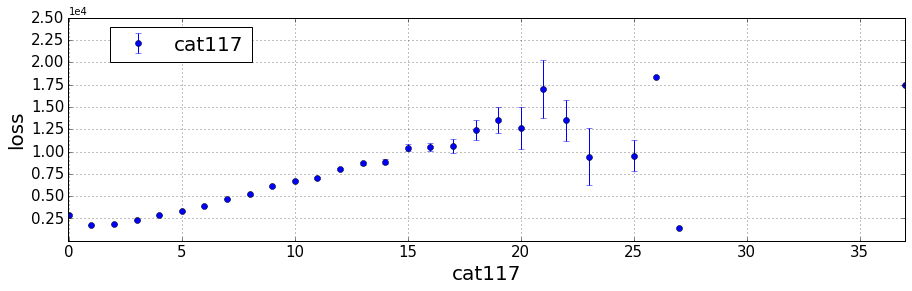

In [34]:
train_2['cat117'] = train_2[imp_features].sum(axis=1)
plot_feature_loss(train_2,feature_name = 'cat117')

In [35]:
# rest_features = ['cat15', 'cat18', 'cat20', 'cat21', 'cat22', 'cat26', 'cat27', 'cat31', 'cat34', 'cat35', 'cat37', 'cat44',
#                  'cat48', 'cat49', 'cat50', 'cat51', 'cat53', 'cat54', 'cat55', 'cat56', 'cat58', 'cat60', 'cat61', 'cat62',
#                  'cat63', 'cat64', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat74', 'cat77', 'cat84', 'cat86', 'cat88',
#                  'cat91', 'cat92', 'cat93', 'cat97', 'cat98', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105',
#                  'cat106', 'cat107', 'cat108', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']
rest_features = ['cat15', 'cat18', 'cat20', 'cat21', 'cat22', 'cat26', 'cat27', 'cat31', 'cat34', 'cat35', 'cat37', 'cat44',
                 'cat48', 'cat49', 'cat50', 'cat51', 'cat53', 'cat54', 'cat55', 'cat56', 'cat58', 'cat60', 'cat61', 'cat62',
                 'cat63', 'cat64', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70']

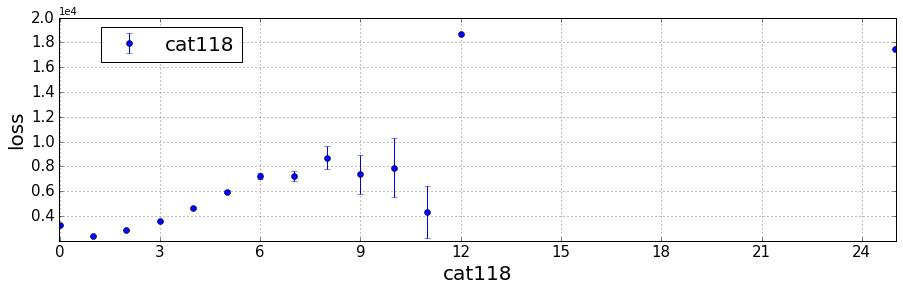

In [36]:
train_2['cat118'] = train_2[rest_features].sum(axis=1)
plot_feature_loss(train_2,feature_name = 'cat118')

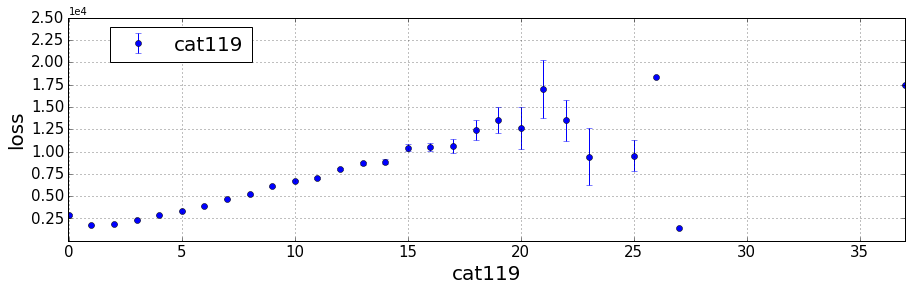

In [37]:
# [15000, 20000]

# imp_features = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13',
#                 'cat14', 'cat16', 'cat17', 'cat19', 'cat23', 'cat24', 'cat25', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33',
#                 'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat45', 'cat46', 'cat47', 'cat52', 'cat57',
#                 'cat59', 'cat65', 'cat71', 'cat72', 'cat73', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82',
#                 'cat83', 'cat85', 'cat87', 'cat89', 'cat90', 'cat94', 'cat95', 'cat96', 'cat99', 'cat109']
imp_features = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13',
                'cat14', 'cat16', 'cat17', 'cat19', 'cat23', 'cat24', 'cat25', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33',
                'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat45', 'cat46', 'cat47', 'cat52', 'cat57',
                'cat59', 'cat65', 'cat71', 'cat72']

train_2['cat119'] = train_2[imp_features].sum(axis=1)
plot_feature_loss(train_2,feature_name = 'cat119')

In [24]:
# tmpDf = train_2[imp_features]!=0
# train_2['cat117'] = tmpDf.sum(axis=1)/float(len(imp_features))
# plot_feature_loss(train_2,feature_name = 'cat117')

In [25]:
# tmpDf = train[imp_features]!=0
# train['cat117'] = tmpDf.sum(axis=1)
# plot_feature_loss(train,feature_name = 'cat117')

In [26]:
# tmpDf = train[rest_features]!=0
# train['cat118'] = tmpDf.sum(axis=1)/float(len(rest_features))
# plot_feature_loss(train,feature_name = 'cat118')